#### Data Cleaning Seats Held by Women in the Parliaments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset with a new variable name
df_women_seats = pd.read_csv("Proportion of seats held by women in national parliaments (%).csv")

# Display basic information about the dataset
print("Dataset Info:")
df_women_seats.info()

# Display the first few rows
df_women_seats.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143 entries, 0 to 6142
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  6143 non-null   object 
 1   Indicator Code  6143 non-null   object 
 2   Country Name    6143 non-null   object 
 3   Country Code    6143 non-null   object 
 4   Year            6143 non-null   int64  
 5   Value           6143 non-null   float64
 6   Disaggregation  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 336.1+ KB


,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Africa Eastern and Southern,AFE,2023,30.518,NaN
1,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Africa Eastern and Southern,AFE,2022,30.524,NaN
2,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Africa Eastern and Southern,AFE,2021,30.475,NaN
3,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Africa Eastern and Southern,AFE,2020,30.128,NaN
4,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Africa Eastern and Southern,AFE,2019,29.275,NaN


In [3]:
# List of recognized country codes (ISO 3166-1 alpha-3)
recognized_country_codes = [
    "AFG", "ALB", "DZA", "AND", "AGO", "ARG", "ARM", "AUS", "AUT", "AZE",
    "BHS", "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BTN", "BOL",
    "BIH", "BWA", "BRA", "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR",
    "CAN", "CAF", "TCD", "CHL", "CHN", "COL", "COM", "COG", "COD", "CRI",
    "CIV", "HRV", "CUB", "CYP", "CZE", "DNK", "DJI", "DMA", "DOM", "ECU",
    "EGY", "SLV", "GNQ", "ERI", "EST", "SWZ", "ETH", "FJI", "FIN", "FRA",
    "GAB", "GMB", "GEO", "DEU", "GHA", "GRC", "GRD", "GTM", "GIN", "GNB",
    "GUY", "HTI", "HND", "HUN", "ISL", "IND", "IDN", "IRN", "IRQ", "IRL",
    "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KIR", "PRK", "KOR",
    "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", "LBY", "LIE", "LTU",
    "LUX", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MRT", "MUS",
    "MEX", "FSM", "MDA", "MCO", "MNG", "MNE", "MAR", "MOZ", "MMR", "NAM",
    "NRU", "NPL", "NLD", "NZL", "NIC", "NER", "NGA", "MKD", "NOR", "OMN",
    "PAK", "PLW", "PAN", "PNG", "PRY", "PER", "PHL", "POL", "PRT", "QAT",
    "ROU", "RUS", "RWA", "KNA", "LCA", "VCT", "WSM", "SMR", "STP", "SAU",
    "SEN", "SRB", "SYC", "SLE", "SGP", "SVK", "SVN", "SLB", "SOM", "ZAF",
    "SSD", "ESP", "LKA", "SDN", "SUR", "SWE", "CHE", "SYR", "TWN", "TJK",
    "TZA", "THA", "TLS", "TGO", "TON", "TTO", "TUN", "TUR", "TKM", "TUV",
    "UGA", "UKR", "ARE", "GBR", "USA", "URY", "UZB", "VUT", "VEN", "VNM",
    "YEM", "ZMB", "ZWE"
]

# Filter only countries that are in the recognized list
df_women_seats = df_women_seats[df_women_seats["Country Code"].isin(recognized_country_codes)]

# Reset index after filtering
df_women_seats.reset_index(drop=True, inplace=True)

print("Filtered dataset with only country-level data:")
df_women_seats.head()


Filtered dataset with only country-level data:


,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Afghanistan,AFG,2021,27.016,NaN
1,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Afghanistan,AFG,2020,27.016,NaN
2,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Afghanistan,AFG,2019,27.869,NaN
3,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Afghanistan,AFG,2017,27.711,NaN
4,Proportion of seats held by women in national ...,SG.GEN.PARL.ZS,Afghanistan,AFG,2016,27.711,NaN


In [4]:
# Pivot the dataset: country_code & country_name as fixed columns, years as separate columns
df_women_pivot = df_women_seats.pivot(index=['Country Code', 'Country Name'], columns='Year', values='Value')

# Reset index to make country_code and country_name normal columns
df_women_pivot.reset_index(inplace=True)

# Display the reshaped dataset
print("Reshaped dataset (before interpolation):")
df_women_pivot.head()


Reshaped dataset (before interpolation):


Year,Country Code,Country Name,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.711,27.711,27.711,27.711,NaN,27.869,27.016,27.016,NaN,NaN
1,AGO,Angola,9.545,15.455,15.455,15.455,15.455,15.455,15.455,15.000,...,36.818,36.818,36.818,30.455,30.455,30.000,30.000,29.545,33.636,33.636
2,ALB,Albania,NaN,NaN,5.161,5.161,5.714,5.714,5.714,6.429,...,20.000,20.714,22.857,27.857,27.857,29.508,29.508,35.714,35.714,35.714
3,AND,Andorra,7.143,7.143,7.143,7.143,14.286,14.286,14.286,14.286,...,50.000,39.286,32.143,32.143,32.143,46.429,46.429,46.429,46.429,50.000
4,ARE,United Arab Emirates,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.500,22.500,22.500,22.500,22.500,50.000,50.000,50.000,50.000,50.000


In [5]:
def fill_nan_with_average(df):
    """
    Interpolates missing values using the linear method along axis=0 (rows).
    Ensures missing values are estimated based on available data.
    """
    for col in df.columns:
        df[col] = df[col].interpolate(method='linear', limit_direction='both', axis=0)
    return df


In [6]:
# Apply interpolation function to fill missing values
df_women_pivot = fill_nan_with_average(df_women_pivot)

# Display the dataset after interpolation
print("Dataset after applying interpolation function:")
df_women_pivot


Dataset after applying interpolation function:


C:\Users\leona\AppData\Local\Temp\ipykernel_17728\3585738137.py:7: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[col] = df[col].interpolate(method='linear', limit_direction='both', axis=0)


Year,Country Code,Country Name,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,9.545,15.455,15.455,15.455,15.455,15.455,15.455,15.000,...,27.711,27.711,27.711,27.711,30.455,27.869,27.016,27.016,33.636,33.636
1,AGO,Angola,9.545,15.455,15.455,15.455,15.455,15.455,15.455,15.000,...,36.818,36.818,36.818,30.455,30.455,30.000,30.000,29.545,33.636,33.636
2,ALB,Albania,8.344,11.299,5.161,5.161,5.714,5.714,5.714,6.429,...,20.000,20.714,22.857,27.857,27.857,29.508,29.508,35.714,35.714,35.714
3,AND,Andorra,7.143,7.143,7.143,7.143,14.286,14.286,14.286,14.286,...,50.000,39.286,32.143,32.143,32.143,46.429,46.429,46.429,46.429,50.000
4,ARE,United Arab Emirates,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.500,22.500,22.500,22.500,22.500,50.000,50.000,50.000,50.000,50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,WSM,Samoa,4.082,4.082,8.163,8.163,6.122,6.122,6.122,6.122,...,6.122,6.122,10.000,10.000,10.000,10.000,10.000,7.843,12.963,12.963
188,YEM,"Yemen, Rep.",14.541,0.664,0.664,0.664,0.669,0.669,0.332,0.332,...,0.332,0.000,0.000,0.000,0.000,0.332,0.332,0.000,0.000,0.000
189,ZAF,South Africa,25.000,28.750,30.000,29.825,29.825,29.825,29.825,32.779,...,41.500,42.000,42.000,41.837,42.748,46.348,46.750,46.582,46.500,45.865
190,ZMB,Zambia,9.677,10.256,10.127,10.127,10.127,12.025,12.025,12.025,...,10.759,12.658,17.964,17.964,17.964,17.964,16.766,15.060,15.060,14.970


In [7]:
# Count NaN values per column
nan_count = df_women_pivot.isna().sum()

# Count Zero values per column
zero_count = (df_women_pivot == 0).sum()

# Display NaN and zero counts
print("🔹 NaN Values Count per Column:")
print(nan_count)

print("\n🔹 Zero Values Count per Column:")
print(zero_count)


🔹 NaN Values Count per Column:
Year
Country Code    0
Country Name    0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

🔹 Zero Values Count per Column:
Year
Country Code     0
Country Name     0
1997             8
1998            10
1999             9
2000             9
2001             9
2002             7
2003             9
2004            11
2005            10
2006            10
2007             8
2008             9
2009            10
2010            10
2011             7
2012             6
2013             4
2014             5
2015       

In [8]:
total_nan = df_women_pivot.isna().sum().sum()
total_zero = (df_women_pivot == 0).sum().sum()

print(f"\n🔹 Total NaN Values in Dataset: {total_nan}")
print(f"🔹 Total Zero Values in Dataset: {total_zero}")



🔹 Total NaN Values in Dataset: 0
🔹 Total Zero Values in Dataset: 184


In [9]:
import pandas as pd

# Replace 0 values with NaN
df_women_pivot.replace(0, pd.NA, inplace=True)

# Convert all columns (except 'Country Code' and 'Country Name') to numeric
year_columns = df_women_pivot.columns[2:]  # Assuming first two columns are 'Country Code' & 'Country Name'
df_women_pivot[year_columns] = df_women_pivot[year_columns].apply(pd.to_numeric, errors='coerce')

# Reapply interpolation to fill newly created NaNs
df_women_pivot.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

# Fill any remaining NaNs with forward and backward fill
df_women_pivot.fillna(method='bfill', inplace=True)
df_women_pivot.fillna(method='ffill', inplace=True)

# Count zeros again
total_zero_after_fix = (df_women_pivot[year_columns] == 0).sum().sum()
print(f"🔹 Total Zero Values After Fix: {total_zero_after_fix}")


🔹 Total Zero Values After Fix: 0


C:\Users\leona\AppData\Local\Temp\ipykernel_17728\2468828493.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_women_pivot.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_17728\2468828493.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_women_pivot.fillna(method='bfill', inplace=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_17728\2468828493.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_women_pivot.fillna(method='ffill', inplace=True)


In [10]:
df_women_pivot

Year,Country Code,Country Name,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,9.5450,15.4550,15.45500,15.455,15.45500,15.4550,15.4550,15.0000,...,27.711,27.711,27.711,27.7110,30.455,27.869,27.016,27.0160,33.6360,33.636
1,AGO,Angola,9.5450,15.4550,15.45500,15.455,15.45500,15.4550,15.4550,15.0000,...,36.818,36.818,36.818,30.4550,30.455,30.000,30.000,29.5450,33.6360,33.636
2,ALB,Albania,8.3440,11.2990,5.16100,5.161,5.71400,5.7140,5.7140,6.4290,...,20.000,20.714,22.857,27.8570,27.857,29.508,29.508,35.7140,35.7140,35.714
3,AND,Andorra,7.1430,7.1430,7.14300,7.143,14.28600,14.2860,14.2860,14.2860,...,50.000,39.286,32.143,32.1430,32.143,46.429,46.429,46.4290,46.4290,50.000
4,ARE,United Arab Emirates,17.3845,17.3845,4.33475,16.801,7.90625,22.5125,22.5125,24.0055,...,17.500,22.500,22.500,22.5000,22.500,50.000,50.000,50.0000,50.0000,50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,WSM,Samoa,4.0820,4.0820,8.16300,8.163,6.12200,6.1220,6.1220,6.1220,...,6.122,6.122,10.000,10.0000,10.000,10.000,10.000,7.8430,12.9630,12.963
188,YEM,"Yemen, Rep.",14.5410,0.6640,0.66400,0.664,0.66900,0.6690,0.3320,0.3320,...,0.332,24.061,26.000,25.9185,26.374,0.332,0.332,27.2125,29.7315,29.414
189,ZAF,South Africa,25.0000,28.7500,30.00000,29.825,29.82500,29.8250,29.8250,32.7790,...,41.500,42.000,42.000,41.8370,42.748,46.348,46.750,46.5820,46.5000,45.865
190,ZMB,Zambia,9.6770,10.2560,10.12700,10.127,10.12700,12.0250,12.0250,12.0250,...,10.759,12.658,17.964,17.9640,17.964,17.964,16.766,15.0600,15.0600,14.970


In [11]:
# Calculate the total proportion of seats held by women across all years for each country
country_average = df_women_pivot.set_index('Country Name').drop(columns='Country Code').mean(axis=1)

# Top 10 countries
top_10_countries = country_average.nlargest(10)

# Bottom 10 countries
bottom_10_countries = country_average.nsmallest(10)

# Calculate the global trend (sum of proportions across all countries for each year)
global_trend = df_women_pivot.drop(columns=['Country Name', 'Country Code']).mean(axis=0)

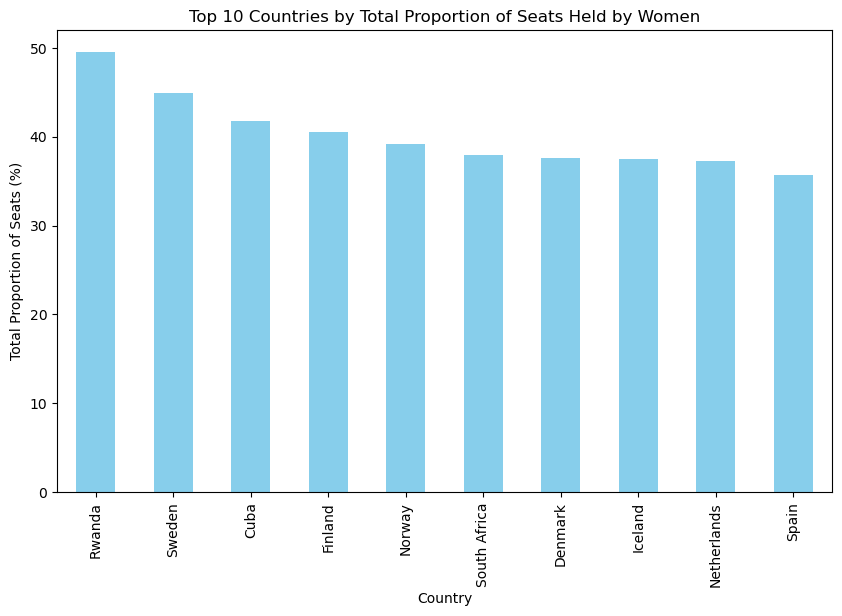

In [12]:
# Plot top 10 countries
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Proportion of Seats Held by Women')
plt.xlabel('Country')
plt.ylabel('Total Proportion of Seats (%)')
plt.show()

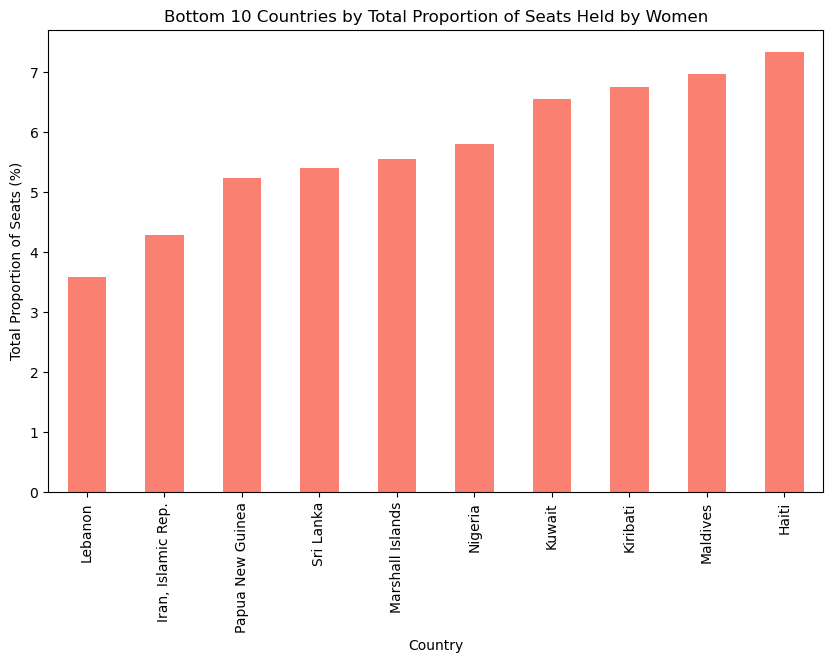

In [13]:
# Plot bottom 10 countries
plt.figure(figsize=(10, 6))
bottom_10_countries.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Countries by Total Proportion of Seats Held by Women')
plt.xlabel('Country')
plt.ylabel('Total Proportion of Seats (%)')
plt.show()

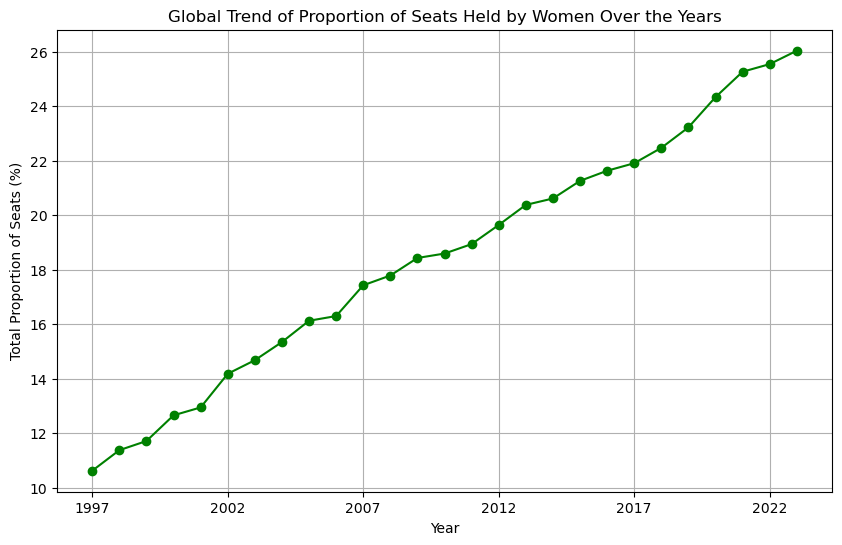

In [14]:
# Plot global trend
plt.figure(figsize=(10, 6))
global_trend.plot(kind='line', marker='o', color='green')
plt.title('Global Trend of Proportion of Seats Held by Women Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Proportion of Seats (%)')
plt.grid()
plt.show()

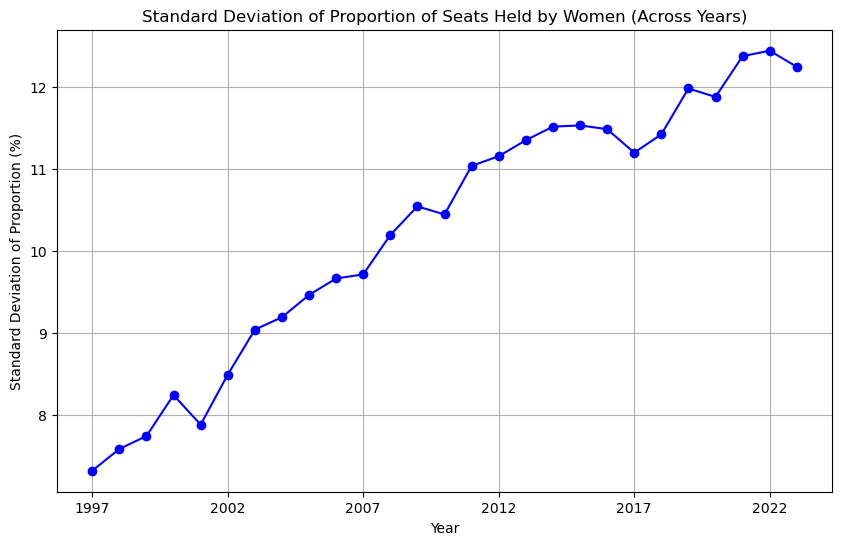

In [15]:
# Calculate the standard deviation of the proportion of seats held by women for each country
country_std = df_women_pivot.set_index('Country Name').drop(columns='Country Code').std(axis=1)

# Top 10 countries with the highest variability (standard deviation)
top_10_std = country_std.nlargest(10)

# Bottom 10 countries with the lowest variability (standard deviation)
bottom_10_std = country_std.nsmallest(10)


# Calculate the standard deviation of the proportion of seats held by women across all countries for each year
yearly_std = df_women_pivot.drop(columns=['Country Name', 'Country Code']).std(axis=0)

# Plot the standard deviation across the years
plt.figure(figsize=(10, 6))
yearly_std.plot(kind='line', marker='o', color='blue')
plt.title('Standard Deviation of Proportion of Seats Held by Women (Across Years)')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Proportion (%)')
plt.grid()
plt.show()

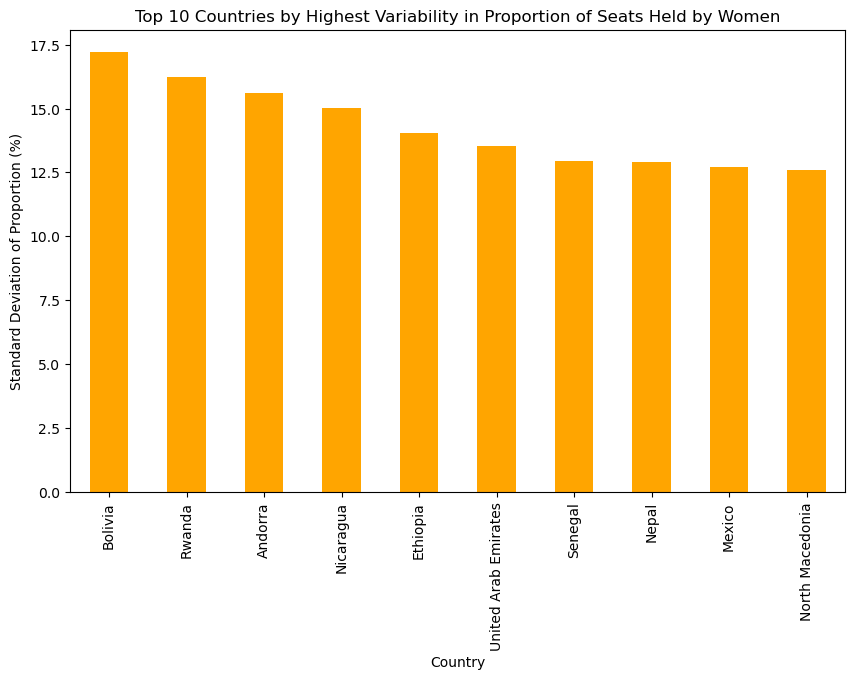

In [16]:
# Plot the top 10 countries with the highest variability
plt.figure(figsize=(10, 6))
top_10_std.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Highest Variability in Proportion of Seats Held by Women')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Proportion (%)')
plt.show()

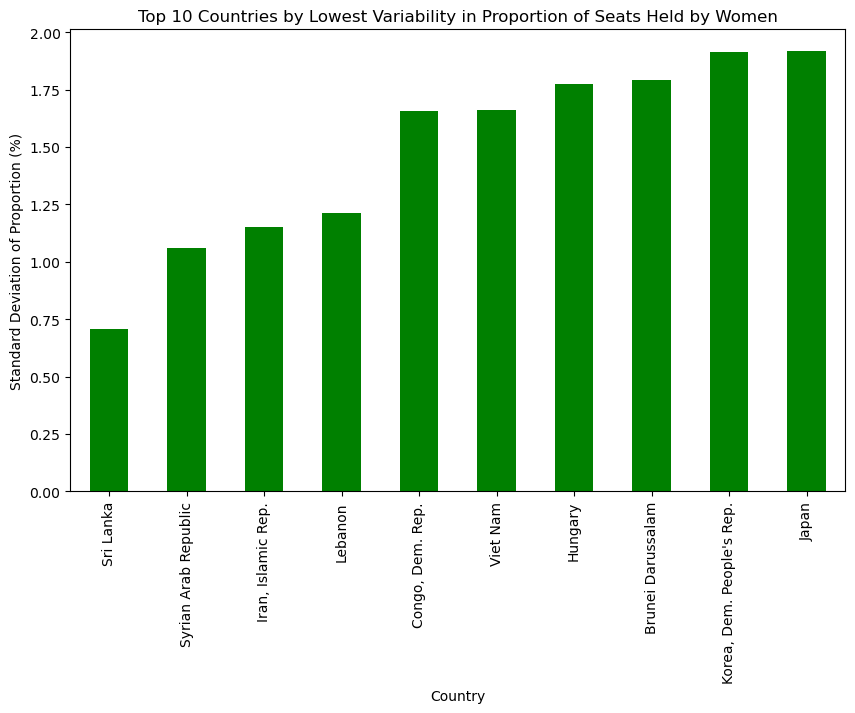

In [17]:
# Plot the bottom 10 countries with the lowest variability
plt.figure(figsize=(10, 6))
bottom_10_std.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Lowest Variability in Proportion of Seats Held by Women')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Proportion (%)')
plt.show()

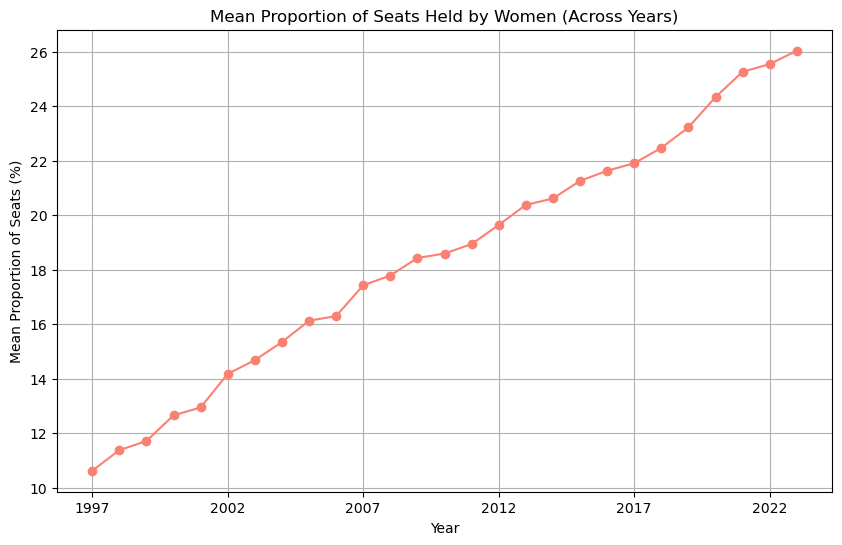

In [18]:
# Calculate the mean of the proportion of seats held by women across all countries for each year
yearly_mean = df_women_pivot.drop(columns=['Country Name', 'Country Code']).mean(axis=0)

# Plot the mean across the years
plt.figure(figsize=(10, 6))
yearly_mean.plot(kind='line', marker='o', color='salmon')
plt.title('Mean Proportion of Seats Held by Women (Across Years)')
plt.xlabel('Year')
plt.ylabel('Mean Proportion of Seats (%)')
plt.grid()
plt.show()


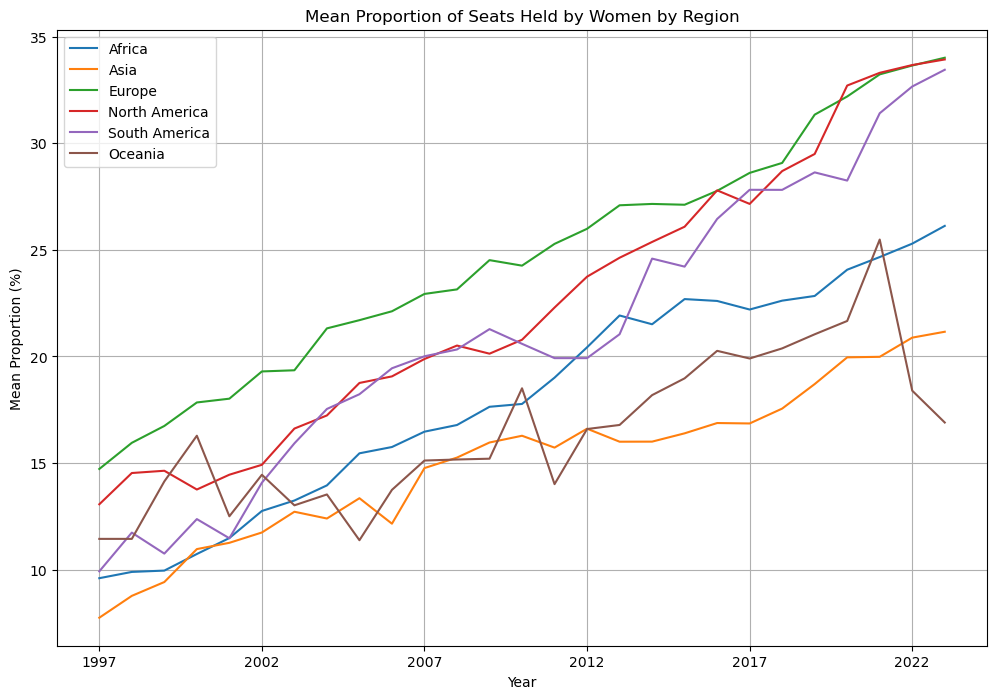

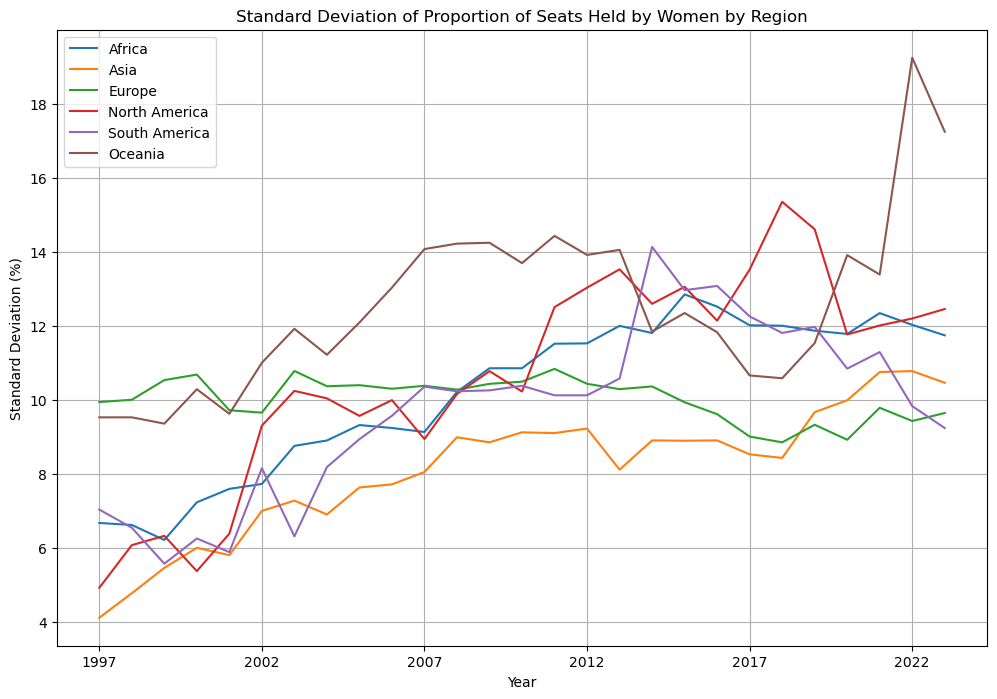

In [19]:
# Define regions (lists of countries)
# Define continents
regions = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia",
        "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei",
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq",
        "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon",
        "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman",
        "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
        "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Ukraine", "United Kingdom"
    ],
    "North America": [
        "Canada", "United States", "Mexico", "Cuba", "Jamaica", "Haiti", "Dominican Republic",
        "Guatemala", "Honduras", "El Salvador", "Nicaragua", "Costa Rica", "Panama"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
        "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "New Zealand", "Fiji", "Papua New Guinea", "Samoa", "Tonga", "Vanuatu"
    ]
}


# Helper function to calculate mean and standard deviation for each region
def calculate_region_stats(region_countries, df):
    region_data = df[df['Country Name'].isin(region_countries)]
    region_mean = region_data.drop(columns=['Country Name', 'Country Code']).mean(axis=0)
    region_std = region_data.drop(columns=['Country Name', 'Country Code']).std(axis=0)
    return region_mean, region_std

# Calculate mean and standard deviation for each region
region_means = {}
region_stds = {}

for region, countries in regions.items():
    mean, std = calculate_region_stats(countries, df_women_pivot)
    region_means[region] = mean
    region_stds[region] = std

# Plot mean trends for all regions
plt.figure(figsize=(12, 8))
for region, mean in region_means.items():
    mean.plot(label=region)
plt.title('Mean Proportion of Seats Held by Women by Region')
plt.xlabel('Year')
plt.ylabel('Mean Proportion (%)')
plt.legend()
plt.grid()
plt.show()

# Plot standard deviation trends for all regions
plt.figure(figsize=(12, 8))
for region, std in region_stds.items():
    std.plot(label=region)
plt.title('Standard Deviation of Proportion of Seats Held by Women by Region')
plt.xlabel('Year')
plt.ylabel('Standard Deviation (%)')
plt.legend()
plt.grid()
plt.show()


In [21]:
df_women_pivot.to_csv("df_seats_reshaped_interpolated_clean.csv", index=False)